Импортируем нужные библиотеки.

In [2]:
import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn.model_selection import train_test_split


import seaborn as sns
import matplotlib.pyplot as plt
# Надо импортнуть всякие керасы-херасы

In [3]:
data_may = pd.read_excel('data_may.xlsx')
data_may.columns = data_may.iloc[1]
data_may = data_may[2:]
data_may.index = pd.RangeIndex(857)
del data_may[data_may.columns[22]]
data_may = data_may.drop(columns=[f'Кол-во НЛЗ {t} ручей' for t in range(1, 7)])


data_july_sept = pd.read_excel('data_july-sep.xlsx')
data_july_sept.columns = data_july_sept.iloc[1]
data_july_sept = data_july_sept[2:]
data_july_sept.index = pd.RangeIndex(2881)
del data_july_sept[data_july_sept.columns[22]]
data_july_sept = data_july_sept.drop(columns=[f'Кол-во НЛЗ {t} ручей' for t in range(1, 7)])


data_june = pd.read_excel('data_june.xlsx')
data_june.columns = data_june.iloc[1]
data_june = data_june[2:]
data_june.index = pd.RangeIndex(650)
del data_june[data_june.columns[22]]
data_june = data_june.drop(columns=['Кол-во заготовок', 'B, %'])

data =  data_june.merge(data_may.merge(data_july_sept, how='outer'), how='outer')
data

1,№ п/п,Паспорт разливки плавки,Дата,"Вес заготовок, т",Марка стали полученная,ГОСТ,Плавка в серии,Сечение заготовки,Тип разливки,"Вес стали (со стенда ППС), т",...,"Pb, %","Sb, %","Mg, %","Zn, %","Сэ, %",Тип защитной трубы,Тип погружного стакана,Тип стакана дозатора п/к,Тип стопора п/к,Замечания по плавке
0,5,12003969,09.06.2020,"157,872",1015,ASTM A510/A510M-18,10,180x180,Открытая,NaN,...,NaN,NaN,NaN,NaN,0.282,RHI DELTEK D99,NaN,RHI JUSTAL DS1015,NaN,NaN
1,7,12003971,09.06.2020,"160,908",Арм500,ГОСТ 34028-2016,12,180x180,Открытая,NaN,...,NaN,NaN,NaN,NaN,0.285,RHI DELTEK D99,NaN,RHI JUSTAL DS1015,NaN,NaN
2,17,12003981,09.06.2020,"163,944",Арм500,ГОСТ 34028-2016,22,180x180,Открытая,NaN,...,NaN,NaN,NaN,NaN,0.322,RHI DELTEK D99,NaN,RHI JUSTAL DS1015,NaN,NaN
3,18,12003982,09.06.2020,"163,944",Арм500,ГОСТ 34028-2016,23,180x180,Открытая,NaN,...,NaN,NaN,NaN,NaN,0.318,RHI DELTEK D99,NaN,RHI JUSTAL DS1015,NaN,NaN
4,19,12003983,09.06.2020,"163,944",Арм500,ГОСТ 34028-2016,24,180x180,Открытая,NaN,...,NaN,NaN,NaN,NaN,0.346,RHI DELTEK D99,NaN,RHI JUSTAL DS1015,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4383,2877,12007491,01.10.2020,"160,368",Арм500,ГОСТ 34028-2016,2,180x180,Открытая,NaN,...,0.0047,NaN,0.0001,NaN,NaN,RHI DELTEK D99,NaN,RHI JUSTAL DS1015,NaN,NaN
4384,2878,12007492,01.10.2020,"166,536",Арм500,ГОСТ 34028-2016,3,180x180,Открытая,NaN,...,0.0046,NaN,0.0001,NaN,NaN,RHI DELTEK D99,NaN,RHI JUSTAL DS1015,NaN,NaN
4385,2879,12007493,02.10.2020,"160,368",Арм500,ГОСТ 34028-2016,4,180x180,Открытая,NaN,...,0.0047,NaN,NaN,NaN,NaN,RHI DELTEK D99,NaN,RHI JUSTAL DS1015,NaN,NaN
4386,2880,12007494,02.10.2020,"166,536",Арм500,ГОСТ 34028-2016,5,180x180,Открытая,NaN,...,0.0047,NaN,NaN,NaN,NaN,RHI DELTEK D99,NaN,RHI JUSTAL DS1015,NaN,NaN


In [4]:
i = 0
for column in data.columns:
    i += 1
    print(i*100//len(data.columns), end=' ')
    if data[column].dtypes == np.float64:
        continue
    try:
        data[column] = data[column].astype('float')
    except ValueError:
        try:
            data[column] = data[column].astype('datetime64[ns]')
        except ValueError:
            # print('First', column)
            for index in range(len(data)):
                if data.loc[index, column] is np.nan:
                    data.loc[index, column] = '0'
                data.loc[index, column] = data.loc[index, column].replace(',', '.')
            try:
                data[column] = data[column].astype('float')
            except ValueError:
                try:
                    data[column] = data[column].astype('datetime64[ns]')
                except ValueError:
                    pass
                    # print('Second', column)
data.dtypes.values

1 2 4 5 7 8 10 11 12 14 15 17 18 20 21 22 24 25 27 28 30 31 32 34 35 37 38 40 41 42 44 45 47 48 50 51 52 54 55 57 58 60 61 62 64 65 67 68 70 71 72 74 75 77 78 80 81 82 84 85 87 88 90 91 92 94 95 97 98 100 

array([dtype('float64'), dtype('float64'), dtype('<M8[ns]'),
       dtype('float64'), dtype('O'), dtype('O'), dtype('float64'),
       dtype('O'), dtype('O'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('O'), dtype('float64'),
       dtype('<M8[ns]'), dtype('float64'), dtype('<M8[ns]'),
       dtype('float64'), dtype('<M8[ns]'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),


In [5]:
data_copy = data.copy()

In [36]:
columns_factors = ['Вес заготовок, т', 'Плавка в серии', 'Сечение заготовки', 'Тип разливки', 'Вес стали расчет., т', 
                   'Остаток металла в с/к, т', 'Вес разлитой стали, т', 'Остатки в п/к, т', 'Тех. обрезь, т', '№ с/к', 
                   'Темп. стали в с/к, °C', '№ п/к', 'Частота качания, кол-во/мин', 'Ход кр-ра, мм', 
                   'Скорость разливки, м/мин', 'Расход воды на кр-р, л/мин', 'Дельта температуры воды, °C', 
                   'Расход воды ЗВО №1, л/мин', 'Расход воды ЗВО №2, л/мин', 'Расход воды ЗВО №3, л/мин', 
                   'Темп 1, °С', 'Темп 2, °С', 
                   'C, %', 'Si, %', 'Mn,%', 'S, %', 'P, %', 'Cr, %', 'Ni, %', 'Cu, %', 'As, %', 'Mo, %', 'Nb, %', 
                   'Sn, %', 'Ti, %', 'V, %', 'Al, %', 'Ca, %', 'N, %', 'Pb, %', 'Mg, %', 'Zn, %', 'Сэ, %']
data_ml = data_copy[columns_factors]
data_ml

1,"Вес заготовок, т",Плавка в серии,Сечение заготовки,Тип разливки,"Вес стали расчет., т","Остаток металла в с/к, т","Вес разлитой стали, т","Остатки в п/к, т","Тех. обрезь, т",№ с/к,...,"Sn, %","Ti, %","V, %","Al, %","Ca, %","N, %","Pb, %","Mg, %","Zn, %","Сэ, %"
0,157.872,10.0,180x180,Открытая,158.272,0.4,157.872,0.0,NaN,3.0,...,NaN,0.0008,0.0017,0.0018,0.0011,0.0035,NaN,NaN,NaN,0.282
1,160.908,12.0,180x180,Открытая,161.308,0.4,160.908,0.0,NaN,1.0,...,NaN,0.0007,0.0020,0.0017,0.0007,0.0040,NaN,NaN,NaN,0.285
2,163.944,22.0,180x180,Открытая,164.344,0.4,163.944,0.0,NaN,1.0,...,NaN,0.0008,0.0024,0.0023,0.0011,0.0038,NaN,NaN,NaN,0.322
3,163.944,23.0,180x180,Открытая,164.344,0.4,163.944,0.0,NaN,9.0,...,NaN,0.0009,0.0023,0.0035,0.0010,0.0031,NaN,NaN,NaN,0.318
4,163.944,24.0,180x180,Открытая,164.344,0.4,163.944,0.0,NaN,6.0,...,NaN,0.0009,0.0025,0.0022,0.0009,0.0027,NaN,NaN,NaN,0.346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4383,160.368,2.0,180x180,Открытая,161.121,0.4,160.721,0.0,NaN,11.0,...,NaN,0.0011,0.0016,0.0027,0.0027,0.0078,0.0047,0.0001,NaN,NaN
4384,166.536,3.0,180x180,Открытая,167.302,0.4,166.902,0.0,NaN,10.0,...,NaN,0.0012,0.0018,0.0028,0.0017,0.0069,0.0046,0.0001,NaN,NaN
4385,160.368,4.0,180x180,Открытая,161.121,0.4,160.721,0.0,NaN,1.0,...,NaN,0.0010,0.0019,0.0021,0.0017,0.0066,0.0047,NaN,NaN,NaN
4386,166.536,5.0,180x180,Открытая,167.302,0.4,166.902,0.0,NaN,3.0,...,NaN,0.0010,0.0017,0.0020,0.0015,0.0063,0.0047,NaN,NaN,NaN


In [37]:
data_ml.dtypes.values

array([dtype('float64'), dtype('float64'), dtype('O'), dtype('O'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64')], dtype=object)

In [16]:
columns_results= ['Стойкость гильзы кр-ра 1, т', 'Стойкость гильзы кр-ра 2, т', 'Стойкость гильзы кр-ра 3, т', 
                  'Стойкость гильзы кр-ра 4, т', 'Стойкость гильзы кр-ра 5, т', 'Стойкость гильзы кр-ра 6, т']
data_ml_res = data_copy[columns_results]
data_ml_res

1,"Стойкость гильзы кр-ра 1, т","Стойкость гильзы кр-ра 2, т","Стойкость гильзы кр-ра 3, т","Стойкость гильзы кр-ра 4, т","Стойкость гильзы кр-ра 5, т","Стойкость гильзы кр-ра 6, т"
0,4879.0,4395.0,7627.0,4442.0,7555.0,5454.0
1,4933.0,4448.0,7680.0,4493.0,7611.0,5507.0
2,5203.0,4721.0,7959.0,4757.0,7881.0,5777.0
3,5230.0,4748.0,7987.0,4784.0,7908.0,5804.0
4,5258.0,4776.0,8014.0,4812.0,7936.0,5832.0
...,...,...,...,...,...,...
4383,13474.0,10092.0,8088.0,8074.0,9596.0,12898.0
4384,13505.0,10116.0,8113.0,8098.0,9627.0,12929.0
4385,13530.0,10144.0,8140.0,8126.0,9651.0,12957.0
4386,13557.0,10172.0,8168.0,8157.0,9679.0,12981.0


In [21]:
p = data_ml_res['Стойкость гильзы кр-ра 1, т'].copy()
for c in data_ml_res.columns:
    p += data_ml_res[c]
p -= data_ml_res['Стойкость гильзы кр-ра 1, т']
p.drop(p.max)

TypeError: 'Series' objects are mutable, thus they cannot be hashed

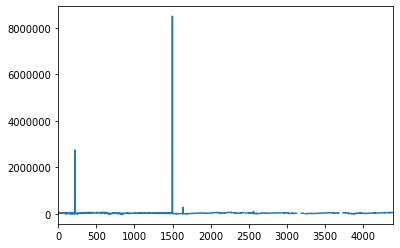

In [20]:
p.plot()

In [39]:
data_ml_res.count()

1
Стойкость гильзы кр-ра 1, т    4378
Стойкость гильзы кр-ра 2, т    4284
Стойкость гильзы кр-ра 3, т    4279
Стойкость гильзы кр-ра 4, т    4312
Стойкость гильзы кр-ра 5, т    4347
Стойкость гильзы кр-ра 6, т    4376
dtype: int64

In [40]:
data_ml.fillna(0, inplace=True)

C:\Users\Dam_mek\Anaconda3\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [41]:
data_ml.loc[data_ml['Тип разливки'] == 'Закрытая', 'Тип разливки'] = 1
data_ml.loc[data_ml['Тип разливки'] == 'Открытая', 'Тип разливки'] = 0
data_ml.loc[data_ml['Сечение заготовки'] == '150x150', 'Сечение заготовки'] = 150
data_ml.loc[data_ml['Сечение заготовки'] == '180x180', 'Сечение заготовки'] = 180
data_ml.loc[:, 'Сечение заготовки'] = data_ml['Сечение заготовки'].astype('float')
data_ml.loc[:, 'Тип разливки'] = data_ml['Тип разливки'].astype('float')
data_ml.dtypes.values

C:\Users\Dam_mek\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


array([dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64')], dtype=object)

In [95]:
data_ml[data_ml_res.columns] = data_ml_res
data_ml = data_ml.dropna()
data_ml

C:\Users\Dam_mek\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


1,"Вес заготовок, т",Плавка в серии,Сечение заготовки,Тип разливки,"Вес стали расчет., т","Остаток металла в с/к, т","Вес разлитой стали, т","Остатки в п/к, т","Тех. обрезь, т",№ с/к,...,"Pb, %","Mg, %","Zn, %","Сэ, %","Стойкость гильзы кр-ра 1, т","Стойкость гильзы кр-ра 2, т","Стойкость гильзы кр-ра 3, т","Стойкость гильзы кр-ра 4, т","Стойкость гильзы кр-ра 5, т","Стойкость гильзы кр-ра 6, т"
0,157.872,10.0,180.0,0.0,158.272,0.4,157.872,0.0,0.0,3.0,...,0.0000,0.0000,0.0,0.282,4879.0,4395.0,7627.0,4442.0,7555.0,5454.0
1,160.908,12.0,180.0,0.0,161.308,0.4,160.908,0.0,0.0,1.0,...,0.0000,0.0000,0.0,0.285,4933.0,4448.0,7680.0,4493.0,7611.0,5507.0
2,163.944,22.0,180.0,0.0,164.344,0.4,163.944,0.0,0.0,1.0,...,0.0000,0.0000,0.0,0.322,5203.0,4721.0,7959.0,4757.0,7881.0,5777.0
3,163.944,23.0,180.0,0.0,164.344,0.4,163.944,0.0,0.0,9.0,...,0.0000,0.0000,0.0,0.318,5230.0,4748.0,7987.0,4784.0,7908.0,5804.0
4,163.944,24.0,180.0,0.0,164.344,0.4,163.944,0.0,0.0,6.0,...,0.0000,0.0000,0.0,0.346,5258.0,4776.0,8014.0,4812.0,7936.0,5832.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4383,160.368,2.0,180.0,0.0,161.121,0.4,160.721,0.0,0.0,11.0,...,0.0047,0.0001,0.0,0.000,13474.0,10092.0,8088.0,8074.0,9596.0,12898.0
4384,166.536,3.0,180.0,0.0,167.302,0.4,166.902,0.0,0.0,10.0,...,0.0046,0.0001,0.0,0.000,13505.0,10116.0,8113.0,8098.0,9627.0,12929.0
4385,160.368,4.0,180.0,0.0,161.121,0.4,160.721,0.0,0.0,1.0,...,0.0047,0.0000,0.0,0.000,13530.0,10144.0,8140.0,8126.0,9651.0,12957.0
4386,166.536,5.0,180.0,0.0,167.302,0.4,166.902,0.0,0.0,3.0,...,0.0047,0.0000,0.0,0.000,13557.0,10172.0,8168.0,8157.0,9679.0,12981.0


In [104]:
data_ml1 = data_ml.drop(columns=['Вес разлитой стали, т', 'Сечение заготовки', 
                                 'Тип разливки', 'Вес стали расчет., т', 'Темп 2, °С'])
data_ml_corr = data_ml1.corr()

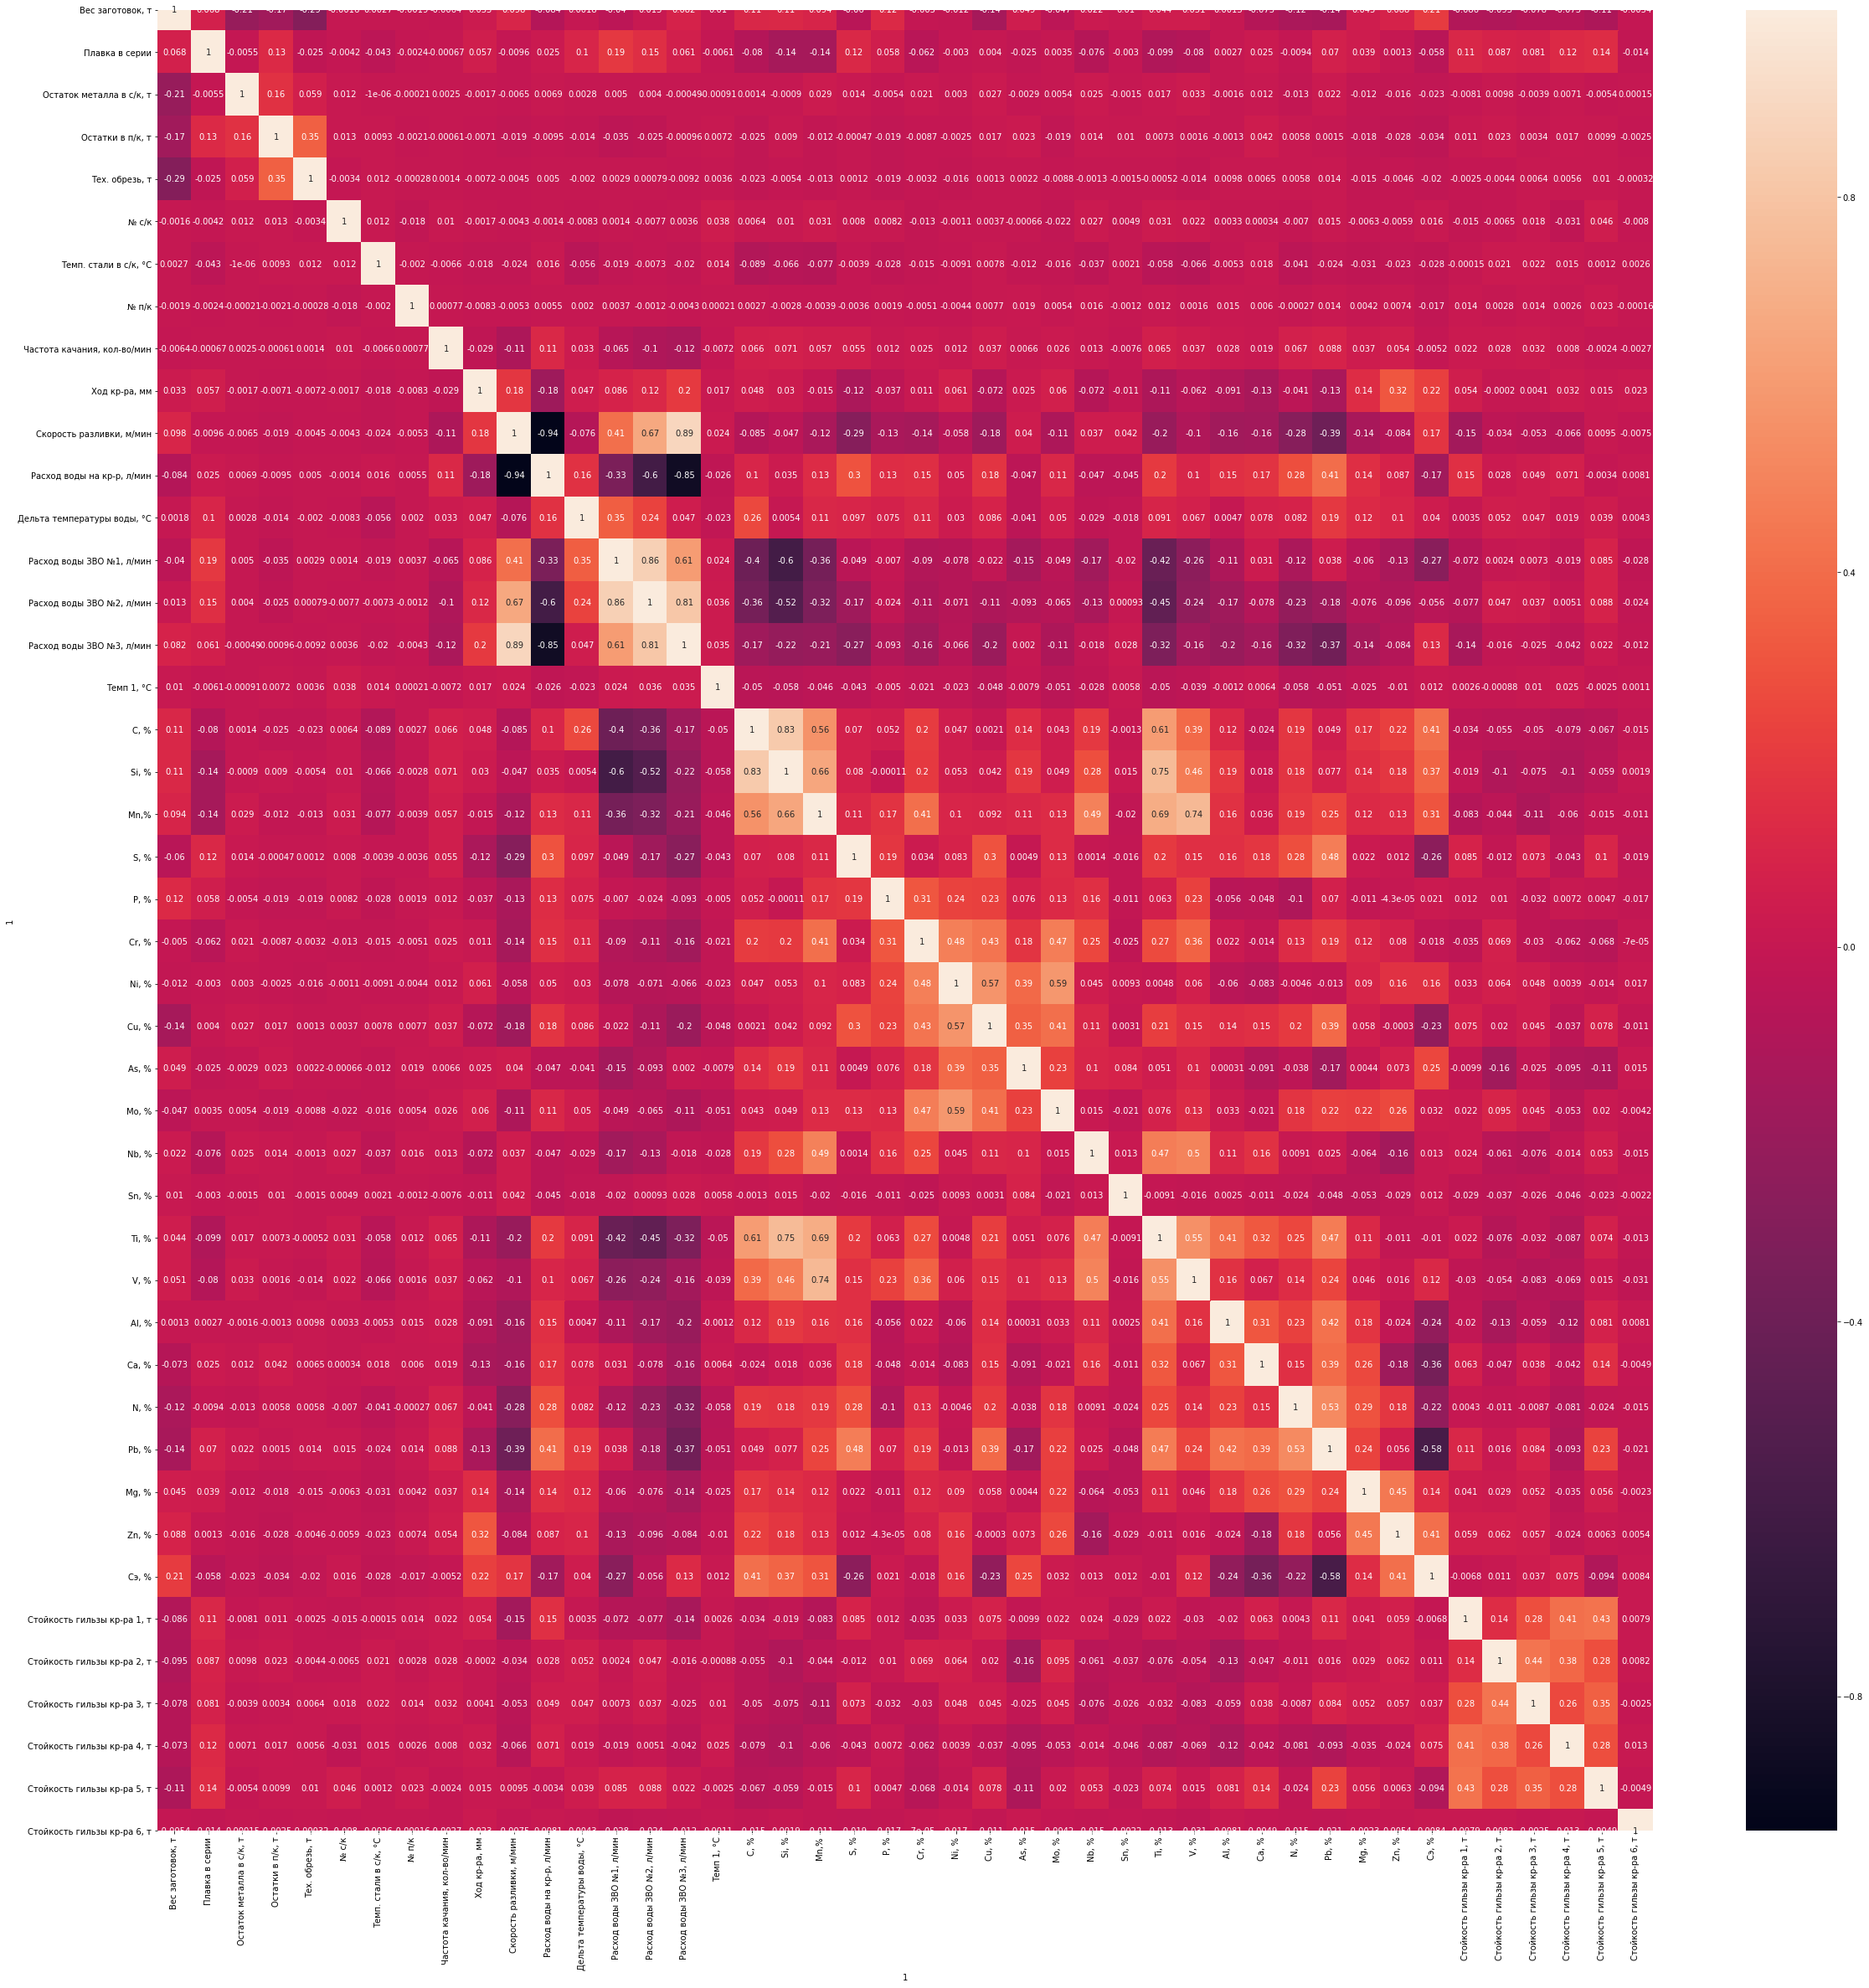

In [105]:
fig, ax = plt.subplots(figsize=(40, 40))
sns.heatmap(data_ml_corr, 
        xticklabels=data_ml_corr.columns,
        yticklabels=data_ml_corr.columns,annot=True,ax=ax)

In [56]:
model = linear_model.LinearRegression()

In [89]:
X = data_ml[columns_factors].to_numpy()
Y = data_ml[columns_results].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2
)

In [90]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
model.predict(x_test)

array([[  4787.81467975,   5607.49318999,   4383.68489   ,
          6345.70440041,   2742.87116382,    306.72720054],
       [  6200.78465379,   5206.29526162,   5837.34781017,
          5865.29379843,   6293.12075487,   5684.83647886],
       [  6387.4581601 ,   6045.35531827,   5819.1696649 ,
          5812.54177734,   6128.99714383,   1256.39191902],
       ...,
       [  6541.51026473,   6488.37052536,   5820.85375997,
          6117.09991248,   6235.73824769, -11501.20661028],
       [  5602.81921563,   4343.04148815,   5027.22552136,
          4862.31538324,   7514.5144255 ,  10820.89223849],
       [  4598.54134032,   6687.30362863,   4029.50669623,
          5980.59463097,   5853.93123959,   -386.44142195]])

In [92]:
y_test

array([[ 5963.,  1768.,  6069.,  5689.,  1182.,  4555.],
       [ 8776.,  8757.,  9945.,  8875.,  9545.,  9660.],
       [ 8778., 10352.,  8888., 10938., 10550.,  8431.],
       ...,
       [ 7381.,  6467.,  8419.,  7662., 10307., 10159.],
       [ 4935.,  7311.,  6594.,  6746.,  8619.,  8644.],
       [ 5103.,  5547.,  3791.,  5796.,  5247.,  5096.]])

In [94]:
model.score(X,  Y)

C:\Users\Dam_mek\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


-0.15479771917147137

In [79]:
y_tr = pd.DataFrame(data={'train': y_train[:, 0], 'test': y_test[:, 0]})
y_tr

ValueError: arrays must all be same length

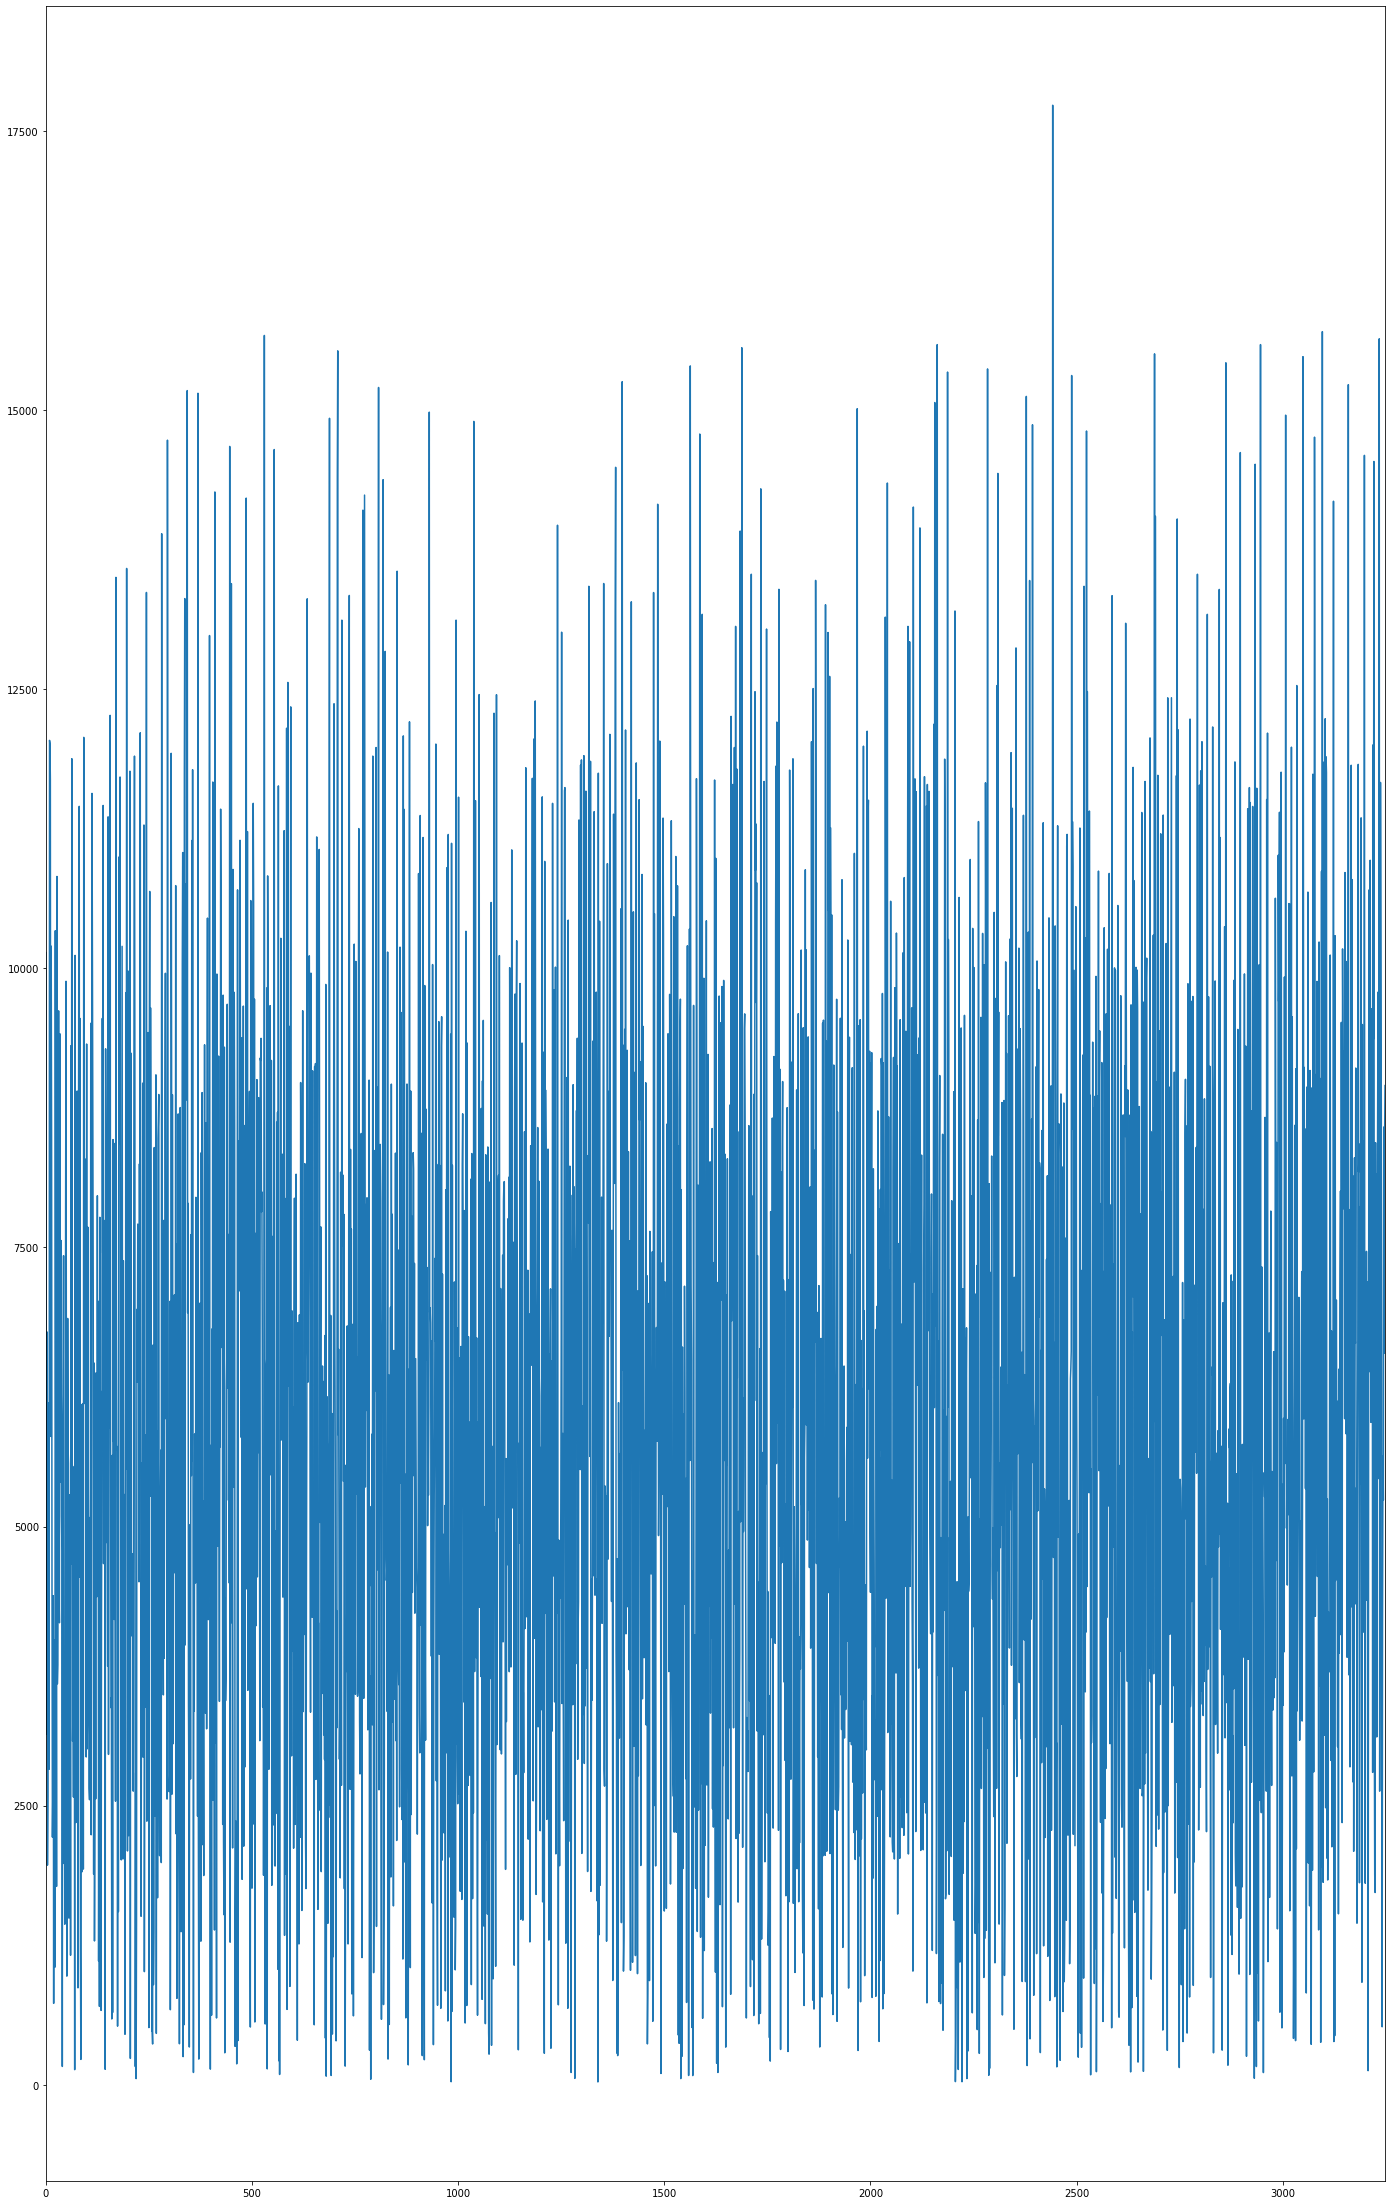

In [69]:
y_tr.plot(figsize=(24, 40))